# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.082860e+01     6.568404e+00
 * time: 0.004231929779052734
     1     2.558157e+01     4.572811e+00
 * time: 0.012539863586425781
     2     1.791296e+01     3.880306e+00
 * time: 0.03252887725830078
     3     1.157138e+01     1.342267e+00
 * time: 0.055977821350097656
     4     1.065687e+01     2.043894e+00
 * time: 0.07157683372497559
     5     1.030081e+01     8.292643e-01
 * time: 0.08725380897521973
     6     1.005115e+01     1.037507e+00
 * time: 0.1029808521270752
     7     9.773328e+00     7.899219e-01
 * time: 0.1186227798461914
     8     9.479382e+00     6.337099e-01
 * time: 0.13460397720336914
     9     9.129617e+00     5.555608e-01
 * time: 0.1507718563079834
    10     8.986898e+00     5.597905e-01
 * time: 0.1669178009033203
    11     8.909227e+00     5.072135e-01
 * time: 0.18320298194885254
    12     8.880331e+00     1.042201e+00
 * time: 0.19529294967651367
    13     8.754242e+00     1.131491e+00
 * time: 

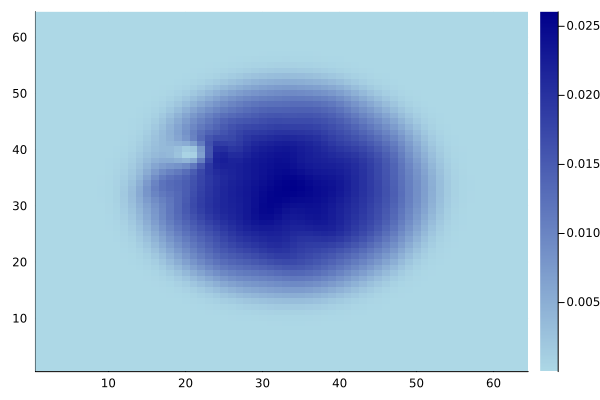

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)